
<center><h1><b>Text Classification with Pre-trained Models<b></h1></center>

---



Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Sentence: 'The website is easy to navigate, but the checkout process is slow.'
Predicted Sentiment: Neutral (Stars: 3, Confidence: 0.56)

Sentence: 'I love the fabric quality, but the stitching is poor.'
Predicted Sentiment: Neutral (Stars: 3, Confidence: 0.62)

Sentence: 'The customer service was very helpful, and the delivery was on time.'
Predicted Sentiment: Positive (Stars: 5, Confidence: 0.51)

Sentence: 'The room was clean, but the air conditioning was broken.'
Predicted Sentiment: Negative (Stars: 2, Confidence: 0.42)

Sentence: 'I didn’t like the product at all; it feels overpriced and flimsy.'
Predicted Sentiment: Negative (Stars: 2, Confidence: 0.50)

Sentence: 'The gym has modern equipment, but it’s often overcrowded.'
Predicted Sentiment: Neutral (Stars: 3, Confidence: 0.53)

Sentence: 'The laptop is lightweight and fast, but it heats up quickly.'
Predicted Sentiment: Neutral (Stars: 3, Confidence: 0.49)

Sentence: 'The meal was delicious, but the portions were too small.'

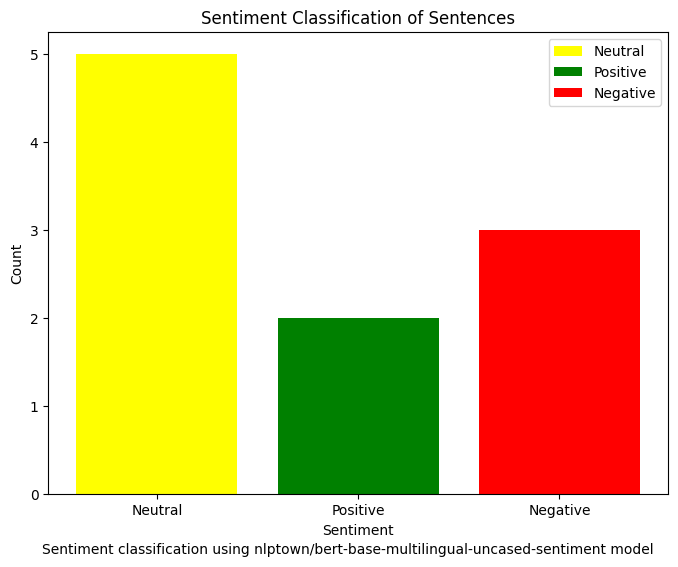

In [25]:
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import Counter

# Load the sentiment analysis pipeline with the model that provides star ratings (0-4)
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# List of sentences to classify
sentences = [
    "The website is easy to navigate, but the checkout process is slow.",
    "I love the fabric quality, but the stitching is poor.",
    "The customer service was very helpful, and the delivery was on time.",
    "The room was clean, but the air conditioning was broken.",
    "I didn’t like the product at all; it feels overpriced and flimsy.",
    "The gym has modern equipment, but it’s often overcrowded.",
    "The laptop is lightweight and fast, but it heats up quickly.",
    "The meal was delicious, but the portions were too small.",
    "The movie was engaging, and the cinematography was stunning.",
    "The software is slow, and it’s full of bugs."
]

# Initialize an empty list to store the sentiment classification results
sentiment_results = []

# Classify each sentence using the model's built-in labels (star ratings)
for sentence in sentences:
    result = classifier(sentence)[0]
    stars = result['label'].split()[0]  # Extract number of stars from label (e.g., '3 stars')
    confidence = result['score']

    # Classify based on the number of stars
    if int(stars) < 3:
        sentiment = "Negative"
    elif int(stars) == 3:
        sentiment = "Neutral"
    else:
        sentiment = "Positive"

    sentiment_results.append(sentiment)
    print(f"Sentence: '{sentence}'\nPredicted Sentiment: {sentiment} (Stars: {stars}, Confidence: {confidence:.2f})\n")

# Count the occurrences of each sentiment
sentiment_count = Counter(sentiment_results)

# Plot the sentiment distribution with specified colors and legend
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'yellow'}
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_count.keys(), sentiment_count.values(), color=[colors[sent] for sent in sentiment_count.keys()])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Classification of Sentences')

# Manually add the legend
plt.legend(bars, ['Neutral', 'Positive', 'Negative'], loc='upper right')

# Adding figure text
plt.figtext(0.5, 0.01, "Sentiment classification using nlptown/bert-base-multilingual-uncased-sentiment model", ha="center", fontsize=10)

plt.show()